In [1]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Importing dataset
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [11]:
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [3]:
features = pd.DataFrame(wine.data, columns=wine.feature_names)
target = pd.DataFrame(wine.target, columns=["TARGET"])

data = pd.concat([features, target], axis=1)

In [4]:
a = data.corr('pearson')
abs(a.loc['TARGET']).sort_values(ascending=False)

TARGET                          1.000000
flavanoids                      0.847498
od280/od315_of_diluted_wines    0.788230
total_phenols                   0.719163
proline                         0.633717
hue                             0.617369
alcalinity_of_ash               0.517859
proanthocyanins                 0.499130
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
alcohol                         0.328222
color_intensity                 0.265668
magnesium                       0.209179
ash                             0.049643
Name: TARGET, dtype: float64

In [5]:
x1 = np.array(data['flavanoids'])
x2 = np.array(data['od280/od315_of_diluted_wines'])
x = np.column_stack((x1,x2))

In [6]:
sc = StandardScaler()
X = sc.fit_transform(x)

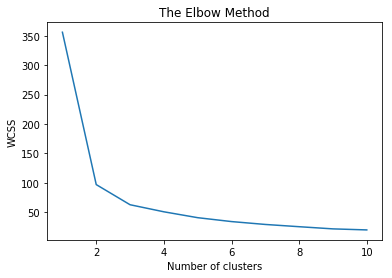

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

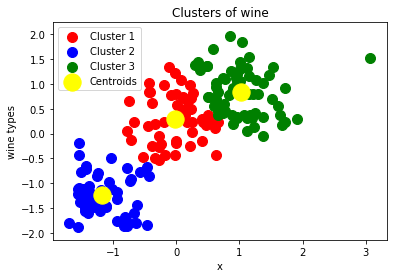

In [17]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of wine')
plt.xlabel('x')
plt.ylabel('wine types')
plt.legend()
plt.show()